# Sales Prediction using Machine Learning


## Introduction

Sales prediction is a crucial aspect for businesses to allocate resources efficiently and strategize marketing efforts. In this analysis, we'll explore the relationship between advertising spends across different channels (TV, Radio, Newspaper) and the resulting sales. We'll then build a predictive model to forecast sales based on advertising spend.


## 1. Data Loading and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. Data Summary and Preliminary Analysis


In [2]:
# Summary statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
# Checking for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 3. Data Visualization

### 3.1 Distribution of Features and Sales

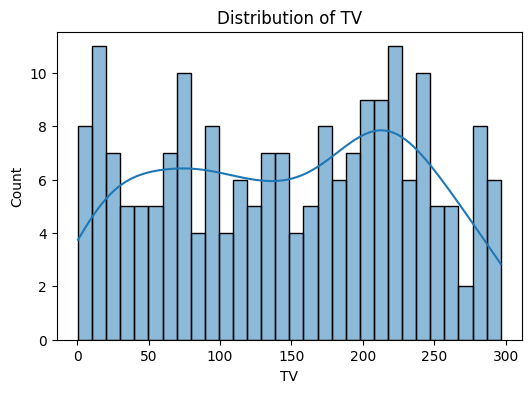

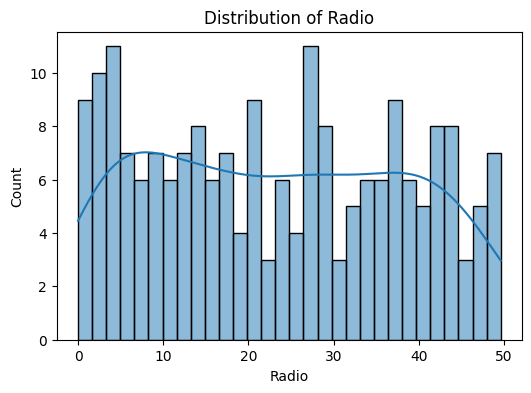

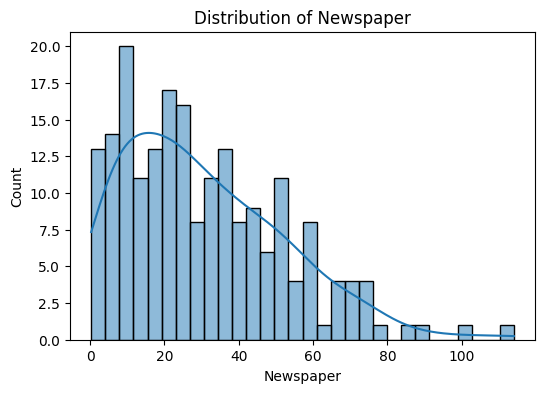

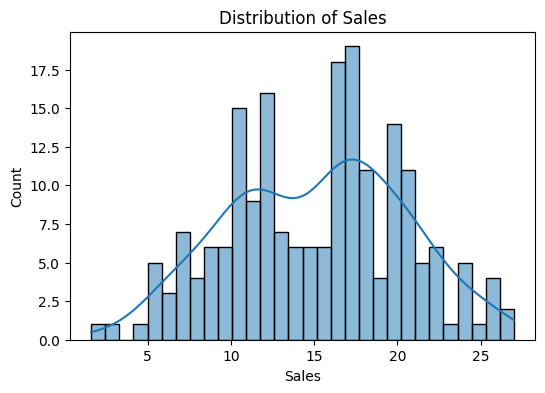

In [4]:
# Plotting distribution of features and sales
columns = ['TV', 'Radio', 'Newspaper', 'Sales']

for column in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### 3.2 Relationship between Features and Sales

c:\Users\Khizar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


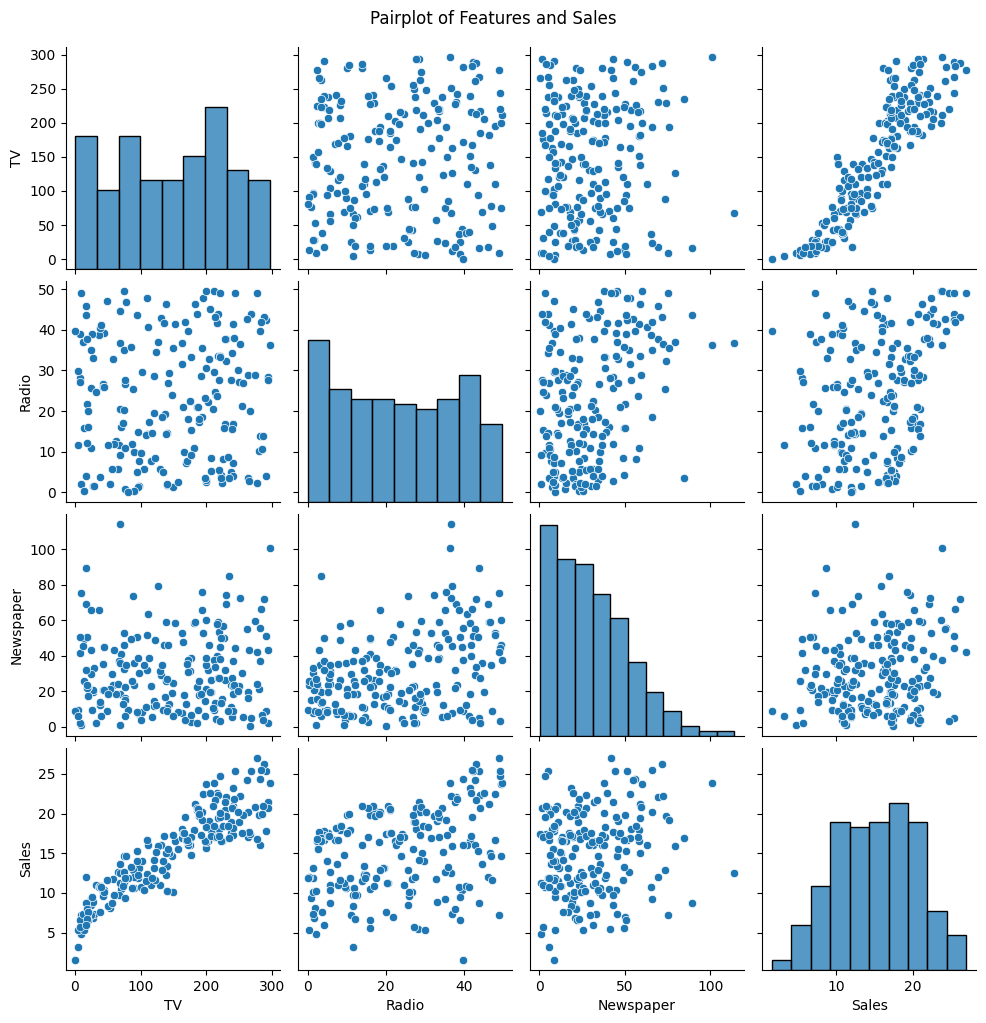

In [5]:
# Pairplot to visualize the relationship between features and sales
sns.pairplot(df)
plt.suptitle('Pairplot of Features and Sales', y=1.02)
plt.show()

### 3.3 Correlation Analysis

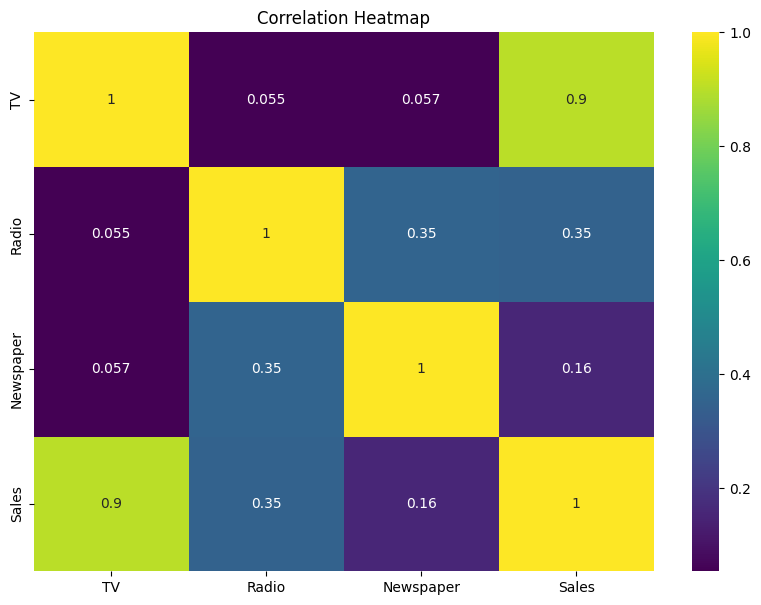

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

## 4. Model Building and Evaluation

### 4.1 Data Preparation

In [7]:
# Splitting the data into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Model Training

In [8]:
# Initializing and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4.3 Model Evaluation

In [9]:
# Predicting sales for the test set
y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 2.91
Root Mean Squared Error: 1.71
R^2 Score: 0.9059
